In [1]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/RandomForestClassifier'

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Thesis/Vietnam/RandomForestClassifier


In [2]:
import pandas as pd
data=pd.read_csv('baseline.csv')
test=data.copy()
test.head()

st_no   age     sex  ...  maxHCT_3to8  dmaxHCT_3to8 maxhemo_3to8
0     1  13.0    Male  ...          NaN           NaN          NaN
1  1000  12.0  Female  ...          NaN           NaN          NaN
2  1002  11.0    Male  ...         40.8           4.0     2.000000
3  1003  13.0    Male  ...         45.7           4.0    12.839506
4  1004  11.0    Male  ...         45.9           6.0    14.750000

[5 rows x 27 columns]

In [3]:
data.info()
data=data.replace('NA',None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_no           2301 non-null   object 
 1   age             2300 non-null   float64
 2   sex             2301 non-null   object 
 3   wt              2296 non-null   float64
 4   day_ill         2301 non-null   int64  
 5   his_tired       2298 non-null   object 
 6   his_vomit       2295 non-null   object 
 7   ttest           2289 non-null   object 
 8   temp            2299 non-null   float64
 9   pulse           2297 non-null   float64
 10  sys_bp          2298 non-null   float64
 11  mucosal_bleed   2283 non-null   object 
 12  abdominal_pain  2291 non-null   object 
 13  liver           2279 non-null   float64
 14  hct_bsl         2259 non-null   float64
 15  plt_bsl         2258 non-null   float64
 16  serotype2       2152 non-null   object 
 17  serology        2271 non-null   o

In [4]:

data.drop(['st_no', 'doi_shock'],axis='columns', inplace = True)

In [5]:
import numpy as np

In [6]:
conversion_parameters = ['sex' ,'his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','serotype2','serology','to_PICU','shock','bleed_hos']
data[conversion_parameters] = np.where(pd.isnull(data[conversion_parameters]),data[conversion_parameters],data[conversion_parameters].astype(str))

In [7]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df = data.copy()

In [8]:
df[conversion_parameters] = df[conversion_parameters].astype("str").apply(en.fit_transform)
df = df.where(~data.isna(), data)
df


age  sex    wt  ...  maxHCT_3to8 dmaxHCT_3to8 maxhemo_3to8
0     13.0    1  31.0  ...          NaN          NaN          NaN
1     12.0    0  37.0  ...          NaN          NaN          NaN
2     11.0    1  27.0  ...         40.8          4.0     2.000000
3     13.0    1  20.0  ...         45.7          4.0    12.839506
4     11.0    1  27.0  ...         45.9          6.0    14.750000
...    ...  ...   ...  ...          ...          ...          ...
2296  13.0    0  39.0  ...         44.3          4.0    15.064935
2297  13.0    0  53.0  ...         42.0          5.0    10.526316
2298   9.0    0  27.5  ...         37.8          3.0     8.000000
2299  10.0    0  33.0  ...         43.0          5.0    16.216216
2300  15.0    0  49.0  ...         39.5          7.0    -2.469136

[2301 rows x 25 columns]

In [9]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df[labels].unique())

sex :  [1 0]
his_tired :  [0 1 nan]
his_vomit :  [1 0 nan]
ttest :  [nan 1 2 0]
mucosal_bleed :  [0 1 nan]
abdominal_pain :  [1 0 nan]
serotype2 :  [1 3 0 5 2 nan 4]
serology :  [nan 0 3 2 1]
to_PICU :  [1 0]
shock :  [1 0]
bleed_hos :  [nan 1 0 3 2]


KNN IMPUTER

In [10]:
import pandas as pd 
import numpy as np 
# importing the KNN from fancyimpute library 
from fancyimpute import KNN 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [11]:
# calling the KNN class 
knn_imputer = KNN() 
# imputing the missing value with knn imputer 
arr_knn= knn_imputer.fit_transform(df) 
  

Imputing row 1/2301 with 13 missing, elapsed time: 1.102
Imputing row 101/2301 with 0 missing, elapsed time: 1.104
Imputing row 201/2301 with 0 missing, elapsed time: 1.105
Imputing row 301/2301 with 0 missing, elapsed time: 1.106
Imputing row 401/2301 with 0 missing, elapsed time: 1.108
Imputing row 501/2301 with 0 missing, elapsed time: 1.110
Imputing row 601/2301 with 0 missing, elapsed time: 1.111
Imputing row 701/2301 with 0 missing, elapsed time: 1.112
Imputing row 801/2301 with 2 missing, elapsed time: 1.113
Imputing row 901/2301 with 0 missing, elapsed time: 1.114
Imputing row 1001/2301 with 0 missing, elapsed time: 1.115
Imputing row 1101/2301 with 0 missing, elapsed time: 1.116
Imputing row 1201/2301 with 0 missing, elapsed time: 1.117
Imputing row 1301/2301 with 0 missing, elapsed time: 1.118
Imputing row 1401/2301 with 0 missing, elapsed time: 1.118
Imputing row 1501/2301 with 0 missing, elapsed time: 1.119
Imputing row 1601/2301 with 0 missing, elapsed time: 1.120
Imputing

In [12]:
df_knn = pd.DataFrame(data=arr_knn,columns=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','to_PICU','shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])
df_knn.head()

age  sex    wt  ...  maxHCT_3to8  dmaxHCT_3to8  maxhemo_3to8
0  13.0  1.0  31.0  ...    49.697765      5.546672     26.030252
1  12.0  0.0  37.0  ...    44.886037      4.865776     16.097823
2  11.0  1.0  27.0  ...    40.800000      4.000000      2.000000
3  13.0  1.0  20.0  ...    45.700000      4.000000     12.839506
4  11.0  1.0  27.0  ...    45.900000      6.000000     14.750000

[5 rows x 25 columns]

In [13]:
df_knn = pd.DataFrame(data=arr_knn,columns=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','to_PICU','shock','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8',])
df_knn.head()

age  sex    wt  ...  maxHCT_3to8  dmaxHCT_3to8  maxhemo_3to8
0  13.0  1.0  31.0  ...    49.697765      5.546672     26.030252
1  12.0  0.0  37.0  ...    44.886037      4.865776     16.097823
2  11.0  1.0  27.0  ...    40.800000      4.000000      2.000000
3  13.0  1.0  20.0  ...    45.700000      4.000000     12.839506
4  11.0  1.0  27.0  ...    45.900000      6.000000     14.750000

[5 rows x 25 columns]

In [14]:
df_knn = df_knn.astype(int)

In [15]:
# check unique values for the conversion
for labels in conversion_parameters:
    print(f'{labels} : ',df_knn[labels].unique())

sex :  [1 0]
his_tired :  [0 1]
his_vomit :  [1 0]
ttest :  [1 2 0]
mucosal_bleed :  [0 1]
abdominal_pain :  [1 0]
serotype2 :  [1 3 0 5 2 4]
serology :  [1 0 3 2]
to_PICU :  [1 0]
shock :  [1 0]
bleed_hos :  [1 0 3 2]


Random Tree Classifier



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

Fininding imp features for Gini

In [17]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
# feature_imp

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# # Creating a bar plot
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

whole datasets 

In [19]:
X=df_knn.copy()
X.drop(['shock'],axis='columns', inplace = True)
y=df_knn.shock

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  3
CONFUSION MATRIX GINI: 
[[655   2]
 [ 27   7]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       657
           1       0.78      0.21      0.33        34

    accuracy                           0.96       691
   macro avg       0.87      0.60      0.65       691
weighted avg       0.95      0.96      0.95       691

MAX DEPTH:  3
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 30   4]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       657
           1       1.00      0.12      0.21        34

    accuracy                           0.96       691
   macro avg       0.98      0.56      0.59       691
weighted avg       0.96      0.96      0.94       691

MAX DEPTH:  4
CONFUSION MATRIX GINI: 
[[654   3]
 [ 19  15]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

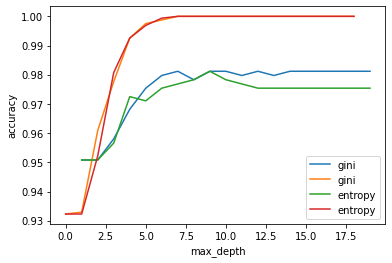

In [20]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,20):
  
  dtree = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=i,random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=i,random_state=1)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Max depth =8 Criterion=Gini Whole Datasets

In [21]:
X=df_knn.copy()
X.drop(['shock'],axis='columns', inplace = True)
y=df_knn.shock

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X.head()

age  sex  wt  day_ill  ...  dminPLT_3to8  maxHCT_3to8  dmaxHCT_3to8  maxhemo_3to8
0   13    1  31        3  ...             6           49             5            26
1   12    0  37        2  ...             5           44             4            16
2   11    1  27        4  ...             6           40             4             2
3   13    1  20        3  ...             4           45             4            12
4   11    1  27        3  ...             6           45             6            14

[5 rows x 24 columns]

In [22]:
dtree = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8,random_state=1)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, pred))
pred1=dtree.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,pred1))

Test Accuracy 0.9782923299565847
Train Accuracy 1.0


In [23]:
import pandas as pd
feature_cols=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','to_PICU','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']
feature_imp = pd.Series(dtree.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

to_PICU           0.497537
minPLT_3to8       0.140062
maxhemo_3to8      0.053106
maxHCT_3to8       0.047280
plt_bsl           0.032392
serology          0.032383
wt                0.022710
hct_bsl           0.020847
age               0.018859
bleed_hos         0.016440
dminPLT_3to8      0.011627
serotype2         0.011329
dmaxHCT_3to8      0.011003
sys_bp            0.010869
pulse             0.010806
his_vomit         0.009468
day_ill           0.009206
ttest             0.008375
liver             0.008334
temp              0.008143
abdominal_pain    0.005590
his_tired         0.005284
sex               0.004472
mucosal_bleed     0.003879
dtype: float64

No handles with labels found to put in legend.


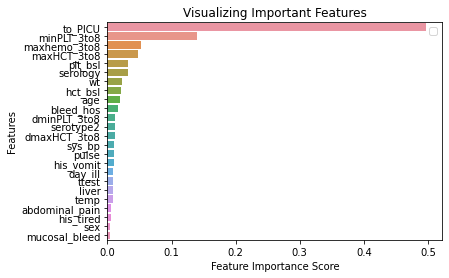

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [25]:
# Importing the metrics package from sklearn library
from sklearn import metrics# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
cm_df

Predicted Negative  Predicted Positive
Actual Negative                 648                   9
Actual Positive                   6                  28

In [26]:
#Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]  
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
#calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
     # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
     # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
     # calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
conf_ppv=(TP/float(TP+FP))
conf_npv=(TN/float(TN+FN))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'PPV Score: {round(conf_ppv,2)}')
print(f'NPV Score: {round(conf_npv,2)}')

True Positives: 28
True Negatives: 648
False Positives: 9
False Negatives: 6
--------------------------------------------------
Accuracy: 0.98
Mis-Classification: 0.02
Sensitivity: 0.82
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.9
PPV Score: 0.76
NPV Score: 0.99


In [27]:
#Calculating class probabilities
pred_proba = [i[1] for i in dtree.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                       'pred_probs':pred_proba})

In [28]:
 # Create figure.
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [29]:
# Create threshold values. 
thresholds = np.linspace(0, 1, 200)

In [30]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
  true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
  false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
  return true_positive / (true_positive + false_negative)

In [31]:
# # Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
  true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
  false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
  return 1 - (true_negative / (true_negative + false_positive))
    

In [32]:
# # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

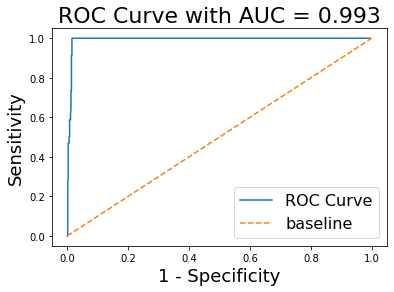

In [33]:
 # Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1,200),
        np.linspace(0, 1,200),
          label='baseline',
          linestyle='--')# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
plt.legend(fontsize=16);

Whole Datasets Sympyomatic

In [34]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','to_PICU','bleed_hos']
X=df_knn[feature_cols]
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  3
CONFUSION MATRIX GINI: 
[[650   7]
 [ 18  16]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       657
           1       0.70      0.47      0.56        34

    accuracy                           0.96       691
   macro avg       0.83      0.73      0.77       691
weighted avg       0.96      0.96      0.96       691

MAX DEPTH:  3
CONFUSION MATRIX ENTROPY: 
[[652   5]
 [ 17  17]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

         

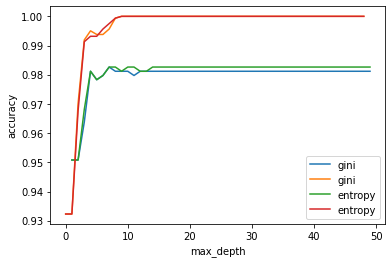

In [35]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,50):
  
  dtree = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree =RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Max Depth 10 Criterion=Entropy

In [36]:
dtree = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,random_state=1)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, pred))
pred1=dtree.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,pred1))

Test Accuracy 0.9797395079594791
Train Accuracy 1.0


In [37]:
import pandas as pd

feature_imp = pd.Series(dtree.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

to_PICU           0.743558
plt_bsl           0.058636
hct_bsl           0.033178
bleed_hos         0.027427
age               0.022733
sys_bp            0.015551
his_vomit         0.013857
pulse             0.013592
ttest             0.011857
temp              0.011266
day_ill           0.011128
mucosal_bleed     0.008572
liver             0.008436
sex               0.007518
his_tired         0.006577
abdominal_pain    0.006116
dtype: float64

No handles with labels found to put in legend.


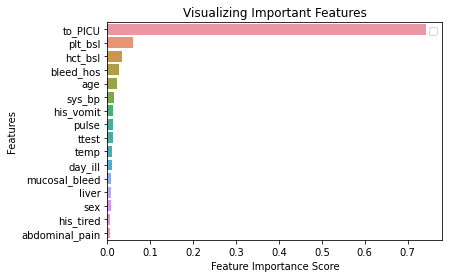

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [39]:
# Importing the metrics package from sklearn library
from sklearn import metrics# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
cm_df

Predicted Negative  Predicted Positive
Actual Negative                 645                  12
Actual Positive                   2                  32

In [40]:
#Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]  
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
#calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
     # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
     # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
     # calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
conf_ppv=(TP/float(TP+FP))
conf_npv=(TN/float(TN+FN)) 
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'PPV Score: {round(conf_ppv,2)}')
print(f'NPV Score: {round(conf_npv,2)}')

True Positives: 32
True Negatives: 645
False Positives: 12
False Negatives: 2
--------------------------------------------------
Accuracy: 0.98
Mis-Classification: 0.02
Sensitivity: 0.94
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.96
PPV Score: 0.73
NPV Score: 1.0


In [41]:
 # Calculating class probabilities
pred_proba = [i[1] for i in dtree.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                         'pred_probs':pred_proba})

In [42]:
# Create figure.
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [43]:
 # Create threshold values. 
thresholds = np.linspace(0, 1, 1000)

In [44]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
  true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
  false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
  return true_positive / (true_positive + false_negative)

In [45]:
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
  true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
  false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
  return 1 - (true_negative / (true_negative + false_positive))
    

In [46]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

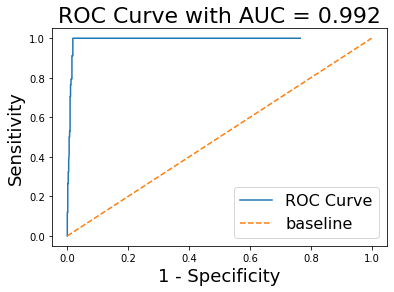

In [47]:
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
          tpr_values, # True Positive Rate on Y-axis
          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1,200),
          np.linspace(0, 1,200),
          label='baseline',
          linestyle='--')# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
plt.legend(fontsize=16);

Whole dataset clinical data
'age','sex','hct_bsl','plt_bsl','serotype2','serology','to_PICU','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8'



In [48]:
feature_cols =['age','sex','hct_bsl','plt_bsl','serotype2','serology','to_PICU','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']
X=df_knn[feature_cols]
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[656   1]
 [ 23  11]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       657
           1       0.92      0.32      0.48        34

    accuracy                           0.97       691
   macro avg       0.94      0.66      0.73       691
weighted avg       0.96      0.97      0.96       691

MAX DEPTH:  2
CONFUSION MATRIX ENTROPY: 
[[654   3]
 [ 27   7]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       657
           1       0.70      0.21      0.32        34

    accuracy                           0.96       691
   macro avg       0.83      0.60      0.65       691
weighted avg       0.95      0.96      0.95       691

MAX DEPTH:  3
CONFUSION MATRIX GINI: 
[[649   8]
 [ 11  23]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

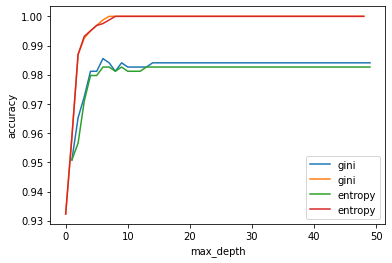

In [49]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,50):
  
  dtree = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree =RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

In [50]:
dtree = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8,random_state=1)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, pred))
pred1=dtree.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,pred1))

Test Accuracy 0.9855282199710564
Train Accuracy 1.0


In [51]:
import pandas as pd

feature_imp = pd.Series(dtree.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

to_PICU         0.557363
minPLT_3to8     0.165332
maxhemo_3to8    0.054851
maxHCT_3to8     0.050478
plt_bsl         0.041851
serology        0.039038
hct_bsl         0.024644
age             0.018992
dmaxHCT_3to8    0.014305
serotype2       0.013841
dminPLT_3to8    0.011624
sex             0.007680
dtype: float64

No handles with labels found to put in legend.


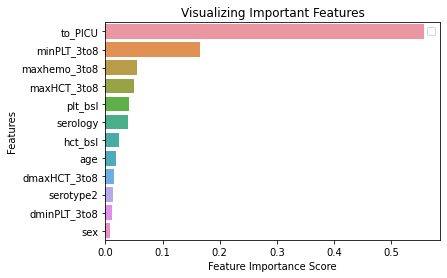

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [53]:
# Importing the metrics package from sklearn library
from sklearn import metrics# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
cm_df

Predicted Negative  Predicted Positive
Actual Negative                 648                   9
Actual Positive                   1                  33

In [54]:
#Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]  
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
#calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
     # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
     # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
     # calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
conf_ppv=(TP/float(TP+FP))
conf_npv=(TN/float(TN+FN))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'PPV Score: {round(conf_ppv,2)}')
print(f'NPV Score: {round(conf_npv,2)}')

True Positives: 33
True Negatives: 648
False Positives: 9
False Negatives: 1
--------------------------------------------------
Accuracy: 0.99
Mis-Classification: 0.01
Sensitivity: 0.97
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.98
PPV Score: 0.79
NPV Score: 1.0


In [55]:
 # Calculating class probabilities
pred_proba = [i[1] for i in dtree.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                         'pred_probs':pred_proba})

In [56]:
# Create figure.
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [57]:
 # Create threshold values. 
thresholds = np.linspace(0, 1, 1000)

In [58]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
  true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
  false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
  return true_positive / (true_positive + false_negative)

In [59]:
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
  true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
  false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
  return 1 - (true_negative / (true_negative + false_positive))
    

In [60]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

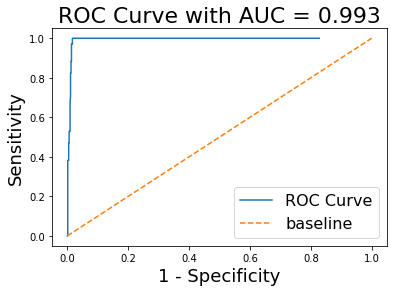

In [61]:
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
          tpr_values, # True Positive Rate on Y-axis
          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1,200),
          np.linspace(0, 1,200),
          label='baseline',
          linestyle='--')# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
plt.legend(fontsize=16);

Whole Datasets without to_PICU

In [62]:
X=df_knn.copy()
X.drop(['shock','to_PICU'],axis='columns', inplace = True)
y=df_knn.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


MAX DEPTH:  1
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691

MAX DEPTH:  1
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  2
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  3
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  3
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  4
CONFUSION MATRIX GINI: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  4
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  5
CONFUSION MATRIX GINI: 
[[656   1]
 [ 32   2]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       657
           1       0.67      0.06      0.11        34

    accuracy                           0.95       691
   macro avg       0.81      0.53      0.54       691
weighted avg       0.94      0.95      0.93       691

MAX DEPTH:  5
CONFUSION MATRIX ENTROPY: 
[[657   0]
 [ 34   0]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.00      0.00      0.00        34

    accuracy                           0.95       691
   macro avg       0.48      0.50      0.49       691
weighted avg       0.90      0.95      0.93       691



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH:  6
CONFUSION MATRIX GINI: 
[[655   2]
 [ 31   3]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       657
           1       0.60      0.09      0.15        34

    accuracy                           0.95       691
   macro avg       0.78      0.54      0.56       691
weighted avg       0.94      0.95      0.94       691

MAX DEPTH:  6
CONFUSION MATRIX ENTROPY: 
[[656   1]
 [ 33   1]]
CLASSIFICATION REPORT ENTROPY: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       657
           1       0.50      0.03      0.06        34

    accuracy                           0.95       691
   macro avg       0.73      0.51      0.52       691
weighted avg       0.93      0.95      0.93       691

MAX DEPTH:  7
CONFUSION MATRIX GINI: 
[[655   2]
 [ 31   3]]
CLASSIFICATION REPORT GINI: 
              precision    recall  f1-score   support

           0   

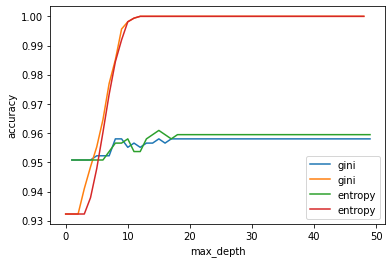

In [63]:
max_depth = []
accuracy_gini_test = []
accuracy_entropy_test = []
accuracy_gini_train = []
accuracy_entropy_train= []
confusion_matrix_gini=[]
confusion_matrix_entropy=[]
for i in range(1,50):
  
  dtree = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  accuracy_gini_test.append(accuracy_score(y_test, pred))
  pred1=dtree.predict(X_train)
  accuracy_gini_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX GINI: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT GINI: ')
  print(classification_report(y_test, pred))


  dtree =RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=142,max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  pred1=dtree.predict(X_train)
  accuracy_entropy_test.append(accuracy_score(y_test, pred))
  accuracy_entropy_train.append(accuracy_score(y_train,pred1))
  print('MAX DEPTH: ',i)
  print('CONFUSION MATRIX ENTROPY: ')
  print(confusion_matrix(y_test, pred))
  print('CLASSIFICATION REPORT ENTROPY: ')
  print(classification_report(y_test, pred))
 

  max_depth.append(i)
  d = pd.DataFrame({'gini_test':pd.Series(accuracy_gini_test),'gini_train':pd.Series(accuracy_gini_train),
           'entropy_test':pd.Series(accuracy_entropy_test),'entropy_train':pd.Series(accuracy_entropy_train),
           'max_depth':pd.Series(max_depth)})


# visualizing changes in parameters
plt.plot('max_depth','gini_test','gini_train' ,data=d, label='gini')
plt.plot('max_depth','entropy_test','entropy_train', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

Max Depth 13 Criterion Entropy

In [64]:
dtree = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=13,random_state=1)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print("Test Accuracy",accuracy_score(y_test, pred))
pred1=dtree.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,pred1))

Test Accuracy 0.9565846599131693
Train Accuracy 1.0


In [65]:
import pandas as pd
feature_cols=['age','sex','wt','day_ill','his_tired','his_vomit','ttest','temp','pulse','sys_bp','mucosal_bleed','abdominal_pain','liver','hct_bsl','plt_bsl','serotype2','serology','bleed_hos','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8']
feature_imp = pd.Series(dtree.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

minPLT_3to8       0.251121
maxhemo_3to8      0.113022
maxHCT_3to8       0.105979
serology          0.078965
plt_bsl           0.057110
wt                0.053265
hct_bsl           0.044669
bleed_hos         0.033744
age               0.033187
pulse             0.025257
serotype2         0.024896
dminPLT_3to8      0.024738
dmaxHCT_3to8      0.024033
sys_bp            0.019885
temp              0.019443
liver             0.015326
day_ill           0.014942
his_vomit         0.014514
ttest             0.014149
sex               0.010320
abdominal_pain    0.009158
his_tired         0.008592
mucosal_bleed     0.003685
dtype: float64

No handles with labels found to put in legend.


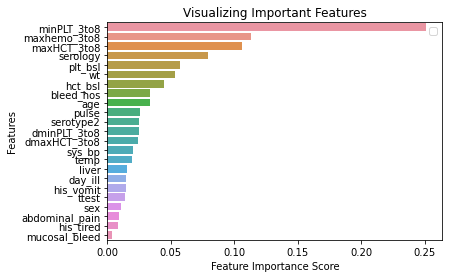

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [67]:
# Importing the metrics package from sklearn library
from sklearn import metrics# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, pred)# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])# Showing the confusion matrix
cm_df

Predicted Negative  Predicted Positive
Actual Negative                 653                   4
Actual Positive                  26                   8

In [68]:
#Creating a function to report confusion metrics# save confusion matrix and slice into four pieces 
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]  
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
#calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
     # calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
     # calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
     # calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))   
conf_ppv=(TP/float(TP+FP))
conf_npv=(TN/float(TN+FN))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'PPV Score: {round(conf_ppv,2)}')
print(f'NPV Score: {round(conf_npv,2)}')

True Positives: 8
True Negatives: 653
False Positives: 4
False Negatives: 26
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.24
Specificity: 0.99
Precision: 0.99
f_1 Score: 0.38
PPV Score: 0.67
NPV Score: 0.96


In [69]:
 # Calculating class probabilities
pred_proba = [i[1] for i in dtree.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                         'pred_probs':pred_proba})

In [70]:
 # Create figure.
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [71]:
# Create threshold values. 
thresholds = np.linspace(0, 1, 200)

In [72]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
  true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
  false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
  return true_positive / (true_positive + false_negative)

In [73]:
# # Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
  true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
  false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
  return 1 - (true_negative / (true_negative + false_positive))
    

In [74]:
# # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

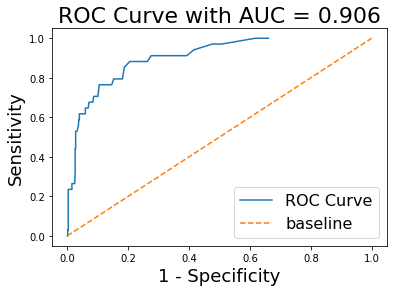

In [75]:
 # Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
          label='ROC Curve')# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1,200),
        np.linspace(0, 1,200),
          label='baseline',
          linestyle='--')# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)# Create legend.
plt.legend(fontsize=16);